In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp

#Read the csv file
df=pd.read_csv('df_wrangled.csv',low_memory=False)

In [2]:
# Print number of numerical and categorical variables.
df.dtypes.value_counts()

float64    74
object     10
dtype: int64

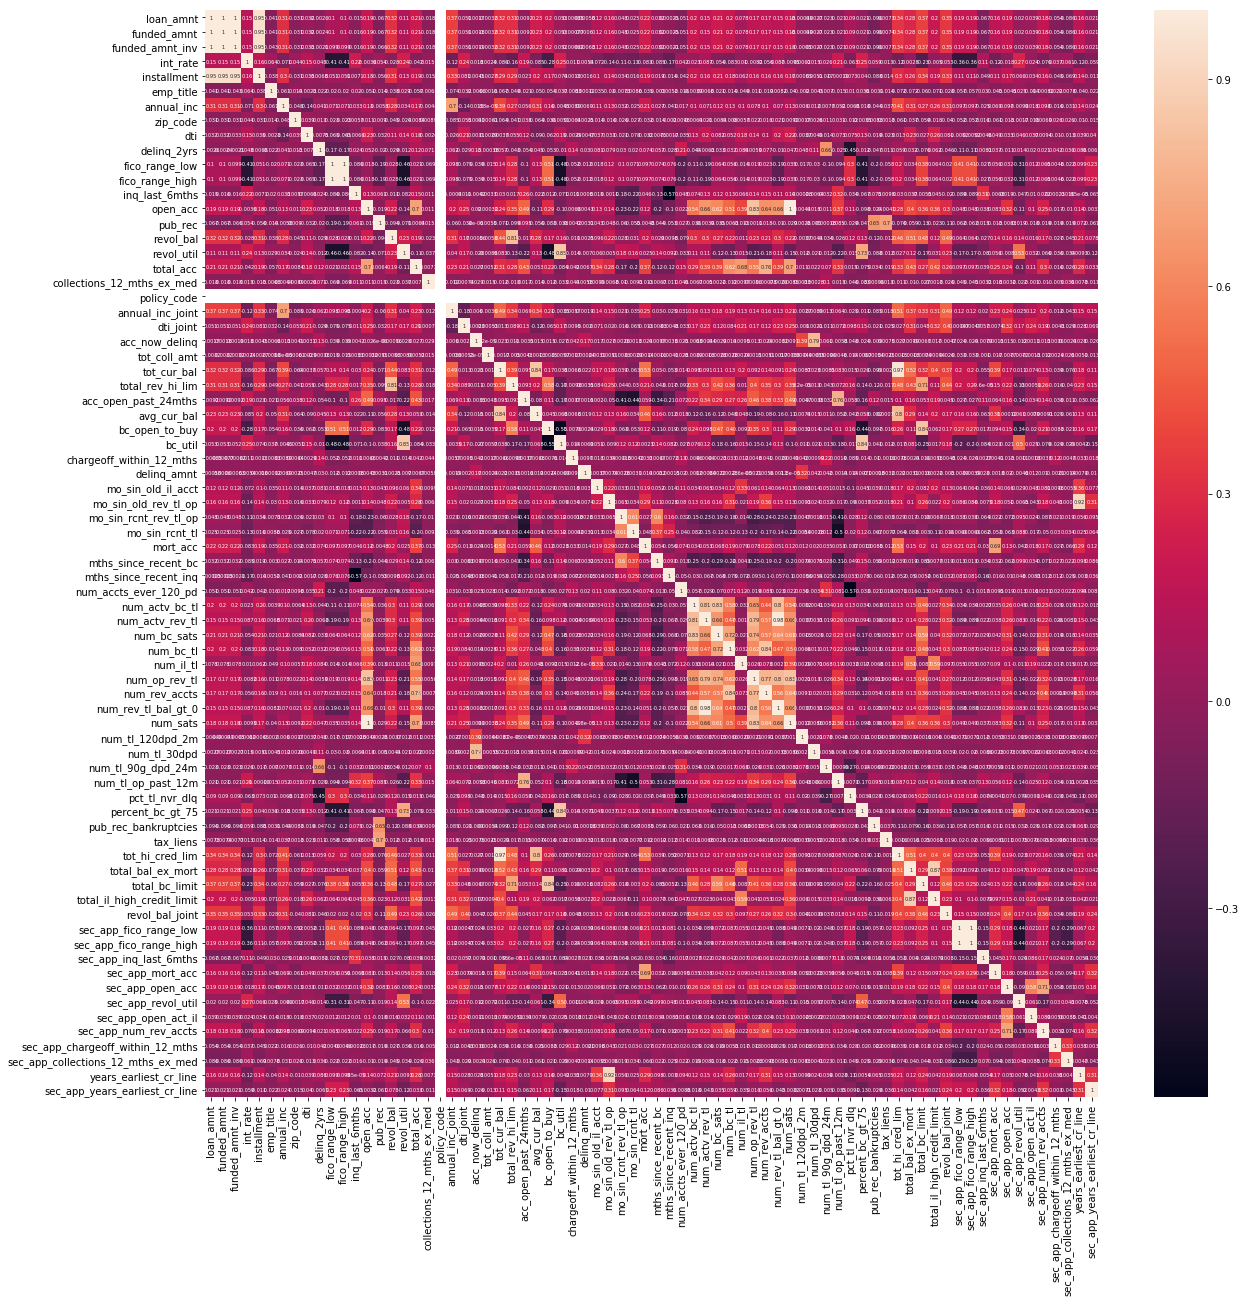

In [3]:
# Plot the correlation matrix to find highly correlated numerical features
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True,annot_kws={"size": 5})
#plt.show()
mp.savefig('heatmap.png', bbox_inches='tight')

In [4]:
# First check the row which is totally white.
df.loc[:,'policy_code'].describe()

count    1266618.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policy_code, dtype: float64

In [5]:
# policy_code is 1 across all row, Therefore, it is useless for prediction and must be removed
df.drop('policy_code', axis=1,inplace=True)

In [6]:
# 1) loan amount, funded amount, invested funded amount, and installment are highly correlated. loan_amnt is kept and the 
# rest are removed.
# 2) fico_range_low and sec_app_fico_range_low (lower boundary range of primary and secondary borrowers’ FICO scores) are  
# removed because they are highly correlated to fico_range_high and sec_app_fico_range_high 
# (upper boundary range of primary and secondary borrowers’ FICO scores), respectively.
# 3) num_sats, which is number of satisfactory accounts, is removed because it is highly correlate to open_acc 
# which is the number of open credit lines in the borrower's credit file.
# 4) tot_hi_cred_lim, which is total high credit/credit limit, is removed because it is highly correlated to tot_cur_bal, 
# which is total current balance of all accounts.
# 5) num_rev_tl_bal_gt_0, which is number of revolving trades with balance more than 0, is removed because it is highly 
# correlated to num_actv_rev_tl, which is number of currently active revolving trades
# 6) mo_sin_old_rev_tl_op, which is number of months since oldest revolving account opened, is removed because it is 
# highly correlated to years_earliest_cr_line, which is number of years since the first credit line was opened.


removal_list = ['funded_amnt','funded_amnt_inv','installment','fico_range_low','sec_app_fico_range_low','num_sats',
               'tot_hi_cred_lim','num_rev_tl_bal_gt_0','mo_sin_old_rev_tl_op']

df.drop(removal_list,axis=1,inplace=True)

In [7]:
df.describe()

,loan_amnt,int_rate,emp_title,annual_inc,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,years_earliest_cr_line,sec_app_years_earliest_cr_line
count,1.266618e+06,1.266618e+06,1.187023e+06,1.266618e+06,1.266618e+06,1.266345e+06,1.266618e+06,1.266618e+06,1.266617e+06,1.266618e+06,...,14603.000000,14603.000000,14603.000000,14349.000000,14603.000000,14603.000000,14603.000000,14603.000000,1.266618e+06,21003.000000
mean,1.441237e+04,1.326681e+01,1.820132e+00,7.608045e+04,1.006904e+00,1.823734e+01,3.175504e-01,7.000093e+02,6.626841e-01,1.159078e+01,...,0.759981,1.675957,11.343765,57.369636,2.943642,12.870027,0.056975,0.088886,1.625771e+01,10.444895
std,8.682661e+03,4.752450e+00,1.416723e+00,6.991429e+04,1.863204e-01,1.080605e+01,8.765928e-01,3.173463e+01,9.440454e-01,5.456819e+00,...,1.098733,1.832393,6.550418,26.421426,3.234316,8.398158,0.452859,0.421208,7.488785e+00,9.260898
min,5.000000e+02,5.310000e+00,8.105055e-02,0.000000e+00,2.336163e-01,-1.000000e+00,0.000000e+00,6.290000e+02,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000
25%,8.000000e+03,9.750000e+00,8.753836e-01,4.580000e+04,8.894076e-01,1.179000e+01,0.000000e+00,6.740000e+02,0.000000e+00,8.000000e+00,...,0.000000,0.000000,7.000000,38.100000,1.000000,7.000000,0.000000,0.000000,1.125000e+01,0.000000
50%,1.200000e+04,1.279000e+01,1.213507e+00,6.500000e+04,1.005677e+00,1.760000e+01,0.000000e+00,6.940000e+02,0.000000e+00,1.100000e+01,...,0.000000,1.000000,10.000000,59.500000,2.000000,11.000000,0.000000,0.000000,1.476000e+01,11.090000
75%,2.000000e+04,1.599000e+01,2.166260e+00,9.000000e+04,1.109758e+00,2.402000e+01,0.000000e+00,7.140000e+02,1.000000e+00,1.400000e+01,...,1.000000,3.000000,15.000000,78.500000,4.000000,17.000000,0.000000,0.000000,2.001000e+01,15.840000
max,4.000000e+04,3.099000e+01,2.780034e+01,1.099920e+07,9.928693e+00,9.990000e+02,3.900000e+01,8.500000e+02,8.000000e+00,9.000000e+01,...,6.000000,18.000000,82.000000,182.500000,38.000000,92.000000,20.000000,11.000000,8.331000e+01,83.310000


In [8]:
# some features have quite large number of zeros. The importance of these features need to be analyzed. 

#  Features with median value of 1 or less are considered as the features with high number of zero values
a = df.loc[:,df.dtypes[df.dtypes=='float64'].index].median()
feature_list = np.array(a[a<=1].index).tolist()

# Print number of features with high number of zero values
len(feature_list)

19

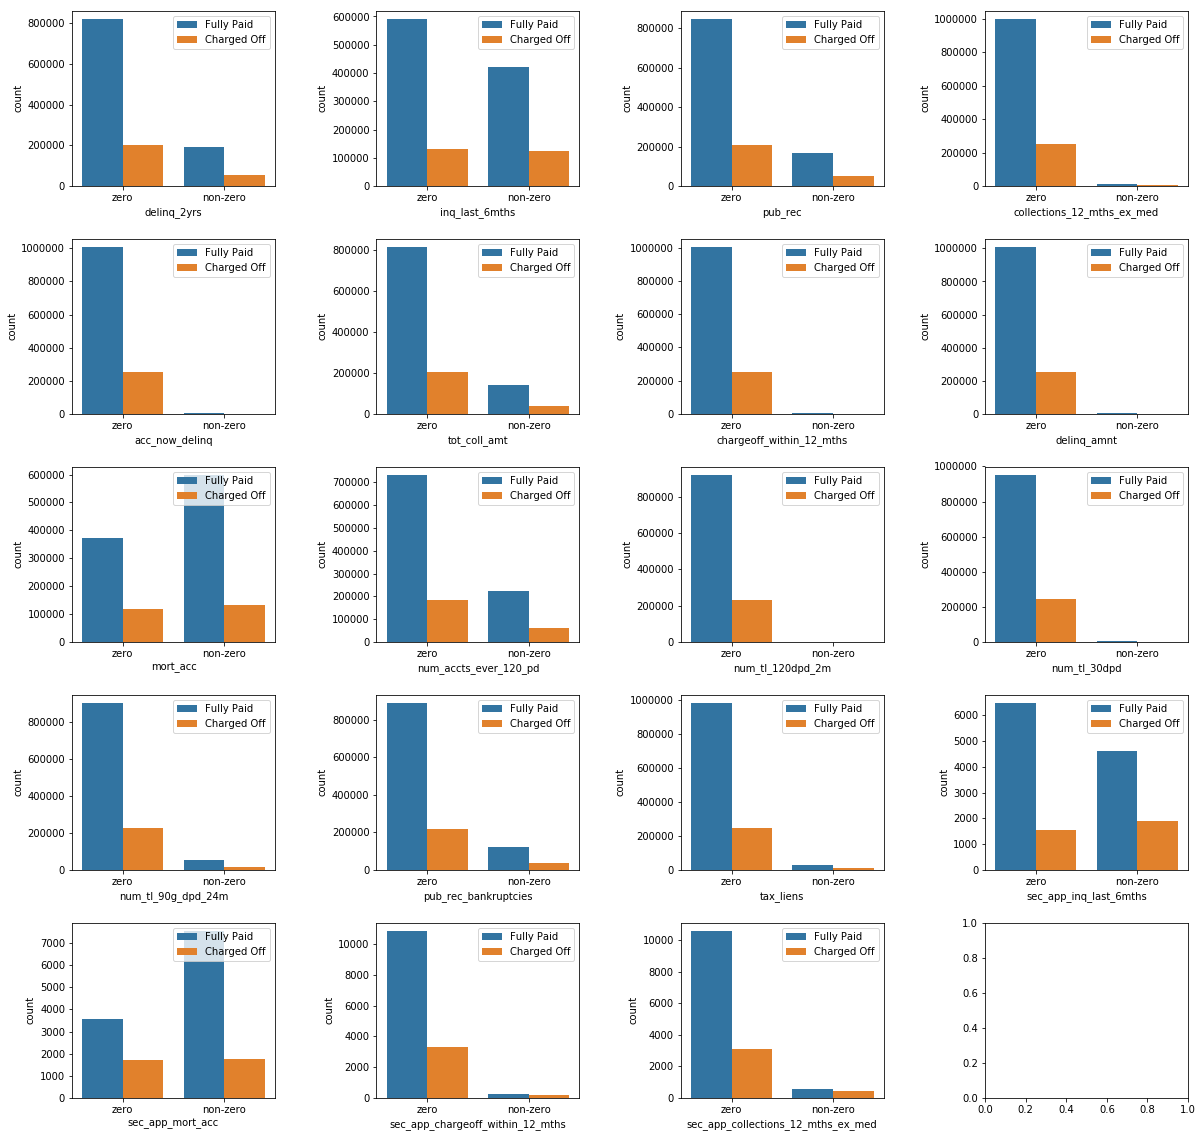

In [9]:
#Label the values of features in feature_list as zero and nonzero, and investigate count plot of fully-paid and charged-off loans
# across zero and nonzero values. 

figure, axes = plt.subplots(5,4,figsize=(20,20))
i = 0
for feature in feature_list:
    new_df = df.loc[:,[feature,'loan_status']]
    new_df.dropna(inplace=True)
    new_df[feature] = new_df[feature].apply(lambda x: 'zero' if x==0 else 'non-zero')
    ax = axes.reshape(-1)[i]
    sns.countplot(ax=ax,x=feature,order=['zero','non-zero'],hue='loan_status',data=new_df)
    ax.legend(loc='upper right')
    i+=1
plt.subplots_adjust(hspace=0.3,wspace=0.5)
mp.savefig('countplot.png', bbox_inches='tight')

#### As the plots above show, some features have zero value across almost all samples. In these features, the ratio of fully-paid to charged-off across zero values is close to the overall ratio which is four. As a result, these features do not significantly impact the response variable and could be removed; features with less than 5% non-zero values are identified and removed.

In [10]:
# Define a function which creates the list of features with less than 5% non-zero elements
def low_percentage_non_zero(features):
    """Create a list of features for which the percentage of non-zero elements in non-null elements is less than or 
    equal to 5 percent"""
    removal_list = []
    for feature in features:
        series = df.loc[:,feature]
        series.dropna(inplace=True)
        new_series = series.apply(lambda x: 'zero' if x==0 else 'non-zero')
        percentage = (new_series=='non-zero').mean()*100
        if percentage<=5:
            removal_list.append(feature)
    return removal_list            

In [11]:
# Create a list of features with less than 5 percent non-zero values
removal_list = low_percentage_non_zero(feature_list)

# Print the list of features with less than 5 percent non-zero values
removal_list

['collections_12_mths_ex_med',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'tax_liens',
 'sec_app_chargeoff_within_12_mths']

In [12]:
# Remove removal_list from df
df.drop(removal_list,axis=1,inplace=True)

In [13]:
# Print number of remaining columns
len(df.columns)

66

### Outliers

#### The numerical features have different ranges and outliers. Instead of investigating each one separately, a function is defined which applies a conservative threshold for outliers across each feature by capping and flooring

In [14]:
# A value will be capped if it is more than 99th percentile or the outlier threshold by box plot 
# (which is 75th percentile plus 1.5 interquartile range) whichever is larger.
# A value will be floored if it is less than 1th percentile or the outlier threshold by box plot 
# (which is 25th percentile minus 1.5 interquartile range) whichever is smaller. The outcome will be floored at 0
# because none of the features can have negative values.

def cap_floor(dataframe=df):
    """This function caps and floors outliers in each feature. A value is capped by 99th percentile or 
    the outlier threshold by box plot (which is 75th percentile plus 1.5 interquartile range) whichever is larger.
    A value is floored if it is less than 1th percentile or the outlier threshold by box plot 
    (which is 25th percentile minus 1.5 interquartile range) whicheverl; the outcome will be floored at 0."""
    
    df_copy = dataframe.copy()
    # Separate numerical features
    for feature in dataframe.dtypes[dataframe.dtypes=='float64'].index:
        # Define different quantiles and IQR
        q1 = dataframe[feature].quantile(0.01)
        q25 = dataframe[feature].quantile(0.25)
        q75 = dataframe[feature].quantile(0.75)
        q99 = dataframe[feature].quantile(0.99)
        iqr = q75-q25
        lower_limit = max(min(q1,q25-1.5*iqr),0)
        upper_limit = max(q99,q75+1.5*iqr)
        df_copy[feature].clip(lower_limit,upper_limit,inplace=True)
    return df_copy

In [15]:
# Apply cap_floor to df to cap and floor outliers
df = cap_floor(df)

#### Ideally, the dataset should have been splitted into training and test set before handling the outliers and the cap_floor transformation should have been implemented only on training set. The dataset is quite large and in order to simplify the process of building the predicting model, the transformation is applied on the entire dataset.

### Missing Values

#### Missing values of features specific to the primary applicant will be handled through imputer in the Machine Learning section. Handling missing values of features specific to joint applications with imputer will be complicated. Since joint applications are less than 2% of overall applications, addressing them before splitting dataset into training and test set is safe.

In [16]:
# Create list of numerical features specific to the secondary applicant
joint_list = ['annual_inc_joint','dti_joint','revol_bal_joint','sec_app_fico_range_high',
              'sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il',
              'sec_app_num_rev_accts','sec_app_collections_12_mths_ex_med','sec_app_years_earliest_cr_line']

# Create a dataframe with rows of joint applications and columns of numerical features specific to joint applications
df1 = df.loc[df.application_type=='Joint App',joint_list]

In [17]:
# Use the median value to fill the missing values in df1
df1 = df1.apply(lambda x:x.fillna(x.median()),axis=0)

# Update df with columns in df1
df.update(df1)

# Fill null values of numericial features specific to the secondary applicant with 0 in df (all these null values belongs to
# individual applications)
df.loc[:,df1.columns] = df.loc[:,df1.columns].fillna(0)

In [18]:
# Save the wrangled data to a csv file
df.to_csv('df_wrangled_2.csv',index=False)